In [4]:
import pm4py
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.statistics.traces.generic.pandas import case_statistics

In [ ]:
log1 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log1 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log1 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log1 = df_log.sort_values('time:timestamp')

In [ ]:
log2 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log2 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log2 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log2 = df_log.sort_values('time:timestamp')

In [ ]:
log3 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log3 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log3 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log3 = df_log.sort_values('time:timestamp')

In [ ]:
log4 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log4 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log4 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log4 = df_log.sort_values('time:timestamp')

In [ ]:
log5 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log5 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log5 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log5 = df_log.sort_values('time:timestamp')

In [ ]:
log2 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log2 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log2 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log2 = df_log.sort_values('time:timestamp')

In [ ]:
log3 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log3 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log3 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log3 = df_log.sort_values('time:timestamp')

In [ ]:
log4 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log4 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log4 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log4 = df_log.sort_values('time:timestamp')

In [ ]:
log5 = pm4py.read_xes('../data/data_input/bottom_200k.xes')
df_log5 = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df_log5 = df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(df_log)
df_log5 = df_log.sort_values('time:timestamp')

In [ ]:
# 1.1  Attributes of the log

In [6]:
event_attributes = pm4py.get_event_attributes(df_log)
print("Event attributes: ")
event_attributes

Event attributes: 


['blockNumber',
 'transactionIndex',
 'logIndex',
 'referrer',
 'concept:name',
 'level',
 'ident:eid',
 'place',
 'time:timestamp',
 'userId',
 'referred',
 'user',
 'caller',
 'currentReferrer',
 'from',
 'case:concept:name',
 'case:ident:piid']

## 1.2 Activity types and frequencies

Activity types and their frequencies: 
Number of different activites: 72


Text(0, 0.5, 'Activities')

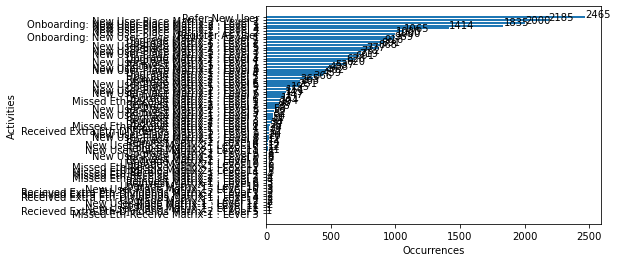

In [7]:
# extract all event types (i.e. activites) and their total frequencies
event_attribute_values = pm4py.get_event_attribute_values(df_log, attribute="concept:name")
print("Activity types and their frequencies: ")
event_attribute_values

# Number of activities
n_activities = len(event_attribute_values)
print("Number of different activites: " + str(n_activities))

import matplotlib.pyplot as plt

# Plot the event occurrence
# Sort dictionary containing the activity counts
event_attribute_values = dict(sorted(event_attribute_values.items(), key=lambda item: item[1]))

keys = list(event_attribute_values.keys())
values = list(event_attribute_values.values())

for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(values[i],keys[i]))

# Visual impression
plt.barh(keys, values)
plt.xlabel("Occurrences")
plt.ylabel("Activities")

## 1.3 Number of traces

In [8]:
# Number of traces, users (is  equivalent in this context)
n_traces = len(log)

print("Number of traces: " + str(n_traces))

winstep = n_traces/(60+1)
winsize = 2 * winstep

print("Winstep = " + str(winstep))
print("Winsize = " + str(winsize))


Number of traces: 1000
Winstep = 16.39344262295082
Winsize = 32.78688524590164


## 1.4 Number of variants

In [33]:
df_traces = df_log.groupby(by="case:ident:piid")["concept:name"].apply(lambda x: str(list(x))).to_frame()

variants_count = case_statistics.get_variant_statistics(df_log,
                                          parameters={case_statistics.Parameters.CASE_ID_KEY: "case:ident:piid",
                                                      case_statistics.Parameters.ACTIVITY_KEY: "concept:name",
                                                      case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})
variants_count = pd.DataFrame(sorted(variants_count, key=lambda x: x['case:ident:piid'], reverse=True))
variants_count

print("Number of variants:")
df_traces["concept:name"].nunique()

Number of variants:


13

## 1.5 Cumulative traffic over time

In [ ]:
df_timestamp = df_log[["time:timestamp", "case:ident:piid"]]
df_time = df_log["time:timestamp"]
df_timestamp["Activity Count"] = 1
df_timestamp.set_index('time:timestamp', inplace=True)
df_timestamp.sort_index(inplace=True)
df_timestamp = df_timestamp.cumsum()

plt.plot(df_time, df_timestamp["Activity Count"], label = 'All')

for i in df_log["case:ident:piid"].unique():
    plt.plot(df_time, df_timestamp[[df_timestamp["case:ident:piid"]== i],["Activity Count"]], label = i)
    

plt.show()

In [8]:
df_timestamp.cumsum()

,case:ident:piid,Activity Count
time:timestamp,,
2020-01-31 22:38:31+01:00,0x4aaa7083535965d1cdd44d1407dcb11eec3f576d,1
2020-01-31 22:38:31+01:00,0x4aaa7083535965d1cdd44d1407dcb11eec3f576d0x4a...,2
2020-01-31 22:38:31+01:00,0x4aaa7083535965d1cdd44d1407dcb11eec3f576d0x4a...,3
2020-01-31 22:38:31+01:00,0x4aaa7083535965d1cdd44d1407dcb11eec3f576d0x4a...,4
2020-01-31 23:18:04+01:00,0x4aaa7083535965d1cdd44d1407dcb11eec3f576d0x4a...,5
...,...,...
2021-03-18 16:31:08+01:00,0x4aaa7083535965d1cdd44d1407dcb11eec3f576d0x4a...,34063
2021-03-18 16:31:08+01:00,0x4aaa7083535965d1cdd44d1407dcb11eec3f576d0x4a...,34064
2021-04-05 14:18:37+01:00,0x4aaa7083535965d1cdd44d1407dcb11eec3f576d0x4a...,34065


# 2. Attribute analysis

## 2.1 Which attributes exist for which activity?

In [ ]:
it_log = pm4py.read_xes('../data/data_input/Sepsis.xes')
it_df_log = log_converter.apply(it_log, variant=log_converter.Variants.TO_DATA_FRAME)
it_df_log = pm4py.objects.log.util.dataframe_utils.convert_timestamp_columns_in_df(it_df_log)
it_df_log = it_df_log.sort_values('time:timestamp')

In [ ]:
event_attributes = pm4py.get_event_attributes(it_df_log)
print("Event attributes: ")
event_attributes

In [ ]:
# Number of traces, users (is  equivalent in this context)
n_traces = len(it_log)

print("Number of traces: " + str(n_traces))


print("Number events: " + str(len(it_df_log)))


In [ ]:
# extract all event types (i.e. activites) and their total frequencies
event_attribute_values = pm4py.get_event_attribute_values(it_df_log, attribute="concept:name")
print("Activity types and their frequencies: ")
event_attribute_values

# Number of activities
n_activities = len(event_attribute_values)
print("Number of different activites: " + str(n_activities))

import matplotlib.pyplot as plt

# Plot the event occurrence
# Sort dictionary containing the activity counts
event_attribute_values = dict(sorted(event_attribute_values.items(), key=lambda item: item[1]))

keys = list(event_attribute_values.keys())
values = list(event_attribute_values.values())

for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(values[i],keys[i]))

# Visual impression
plt.barh(keys, values)
plt.xlabel("Occurrences")
plt.ylabel("Activities")